Oasis Infobyte Internship,AUG-2024

Guru Prasad K M,Data Science Intern

Iris Flowers Classification ML Project:

Dataset Information:
The data set contains 3 classes of 50 instanace each,where each class refer to a type of iris plant.One class is linerly separable from the other 2;it can be easily fit in memory without special scaling capabilities.
Predicted attribute : class of iris plant.
This is an exceedingly simple domain.

Attribute Information:
1 sepal length in cm
2 sepal width in cm
3 petal length in cm
4 petal width in cm
5 class:
- Iris Setosa
- Iris Versicolor
- Iris Virginica

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_df = pd.read_csv("iris.csv")
print("the data has been successfully load.")

the data has been successfully load.


In [3]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#check shape of data
iris_df.shape

(150, 6)

In [5]:
# check basic informationof data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# check statistical summary of data
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#Check null values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
print("unique number of values in dataset Species:",iris_df["Species"].nunique())
print("Unique Species in iris dataset:",iris_df["Species"].unique())

unique number of values in dataset Species: 3
Unique Species in iris dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


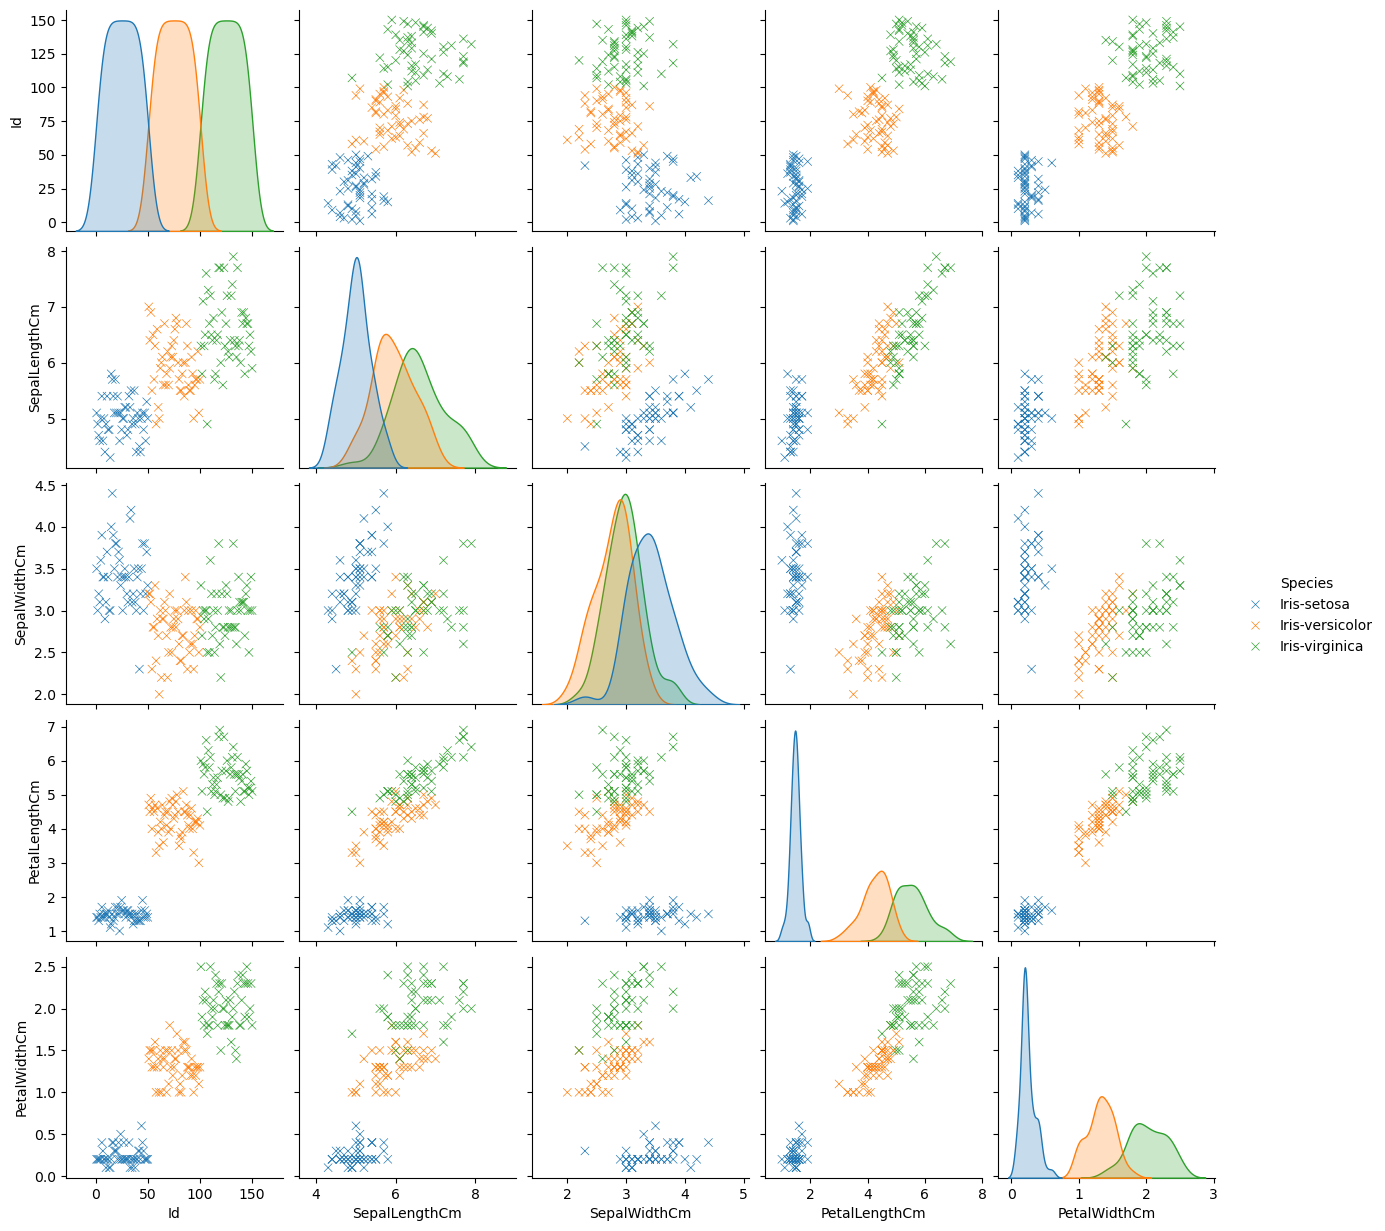

In [9]:
sns.pairplot(iris_df, hue = "Species",markers = "x")
plt.show()

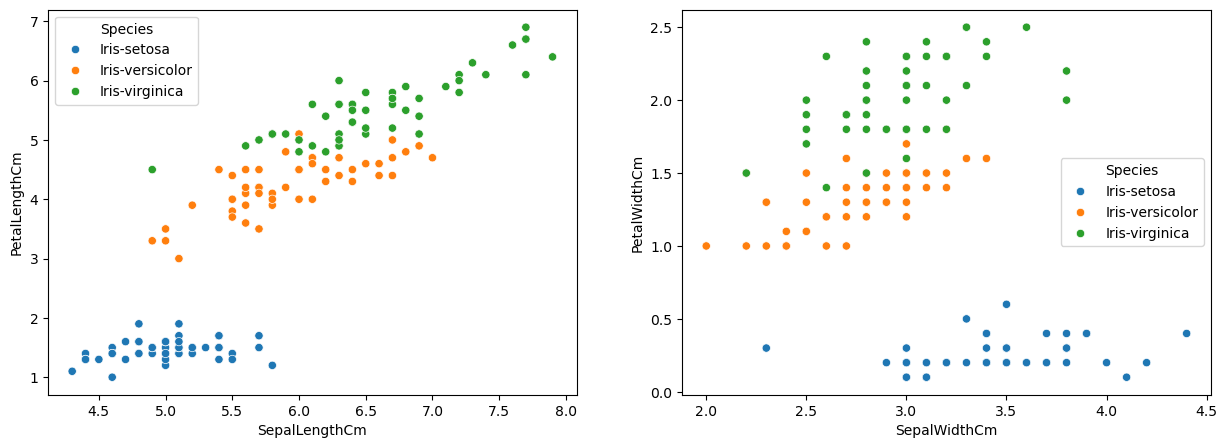

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=iris_df,hue='Species')
plt.subplot(1,2,2)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=iris_df,hue='Species')
plt.show()

In [16]:
# Exclude non-numeric columns
numeric_df = iris_df.select_dtypes(include=[float, int])

# Check Correlation in Dataset
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


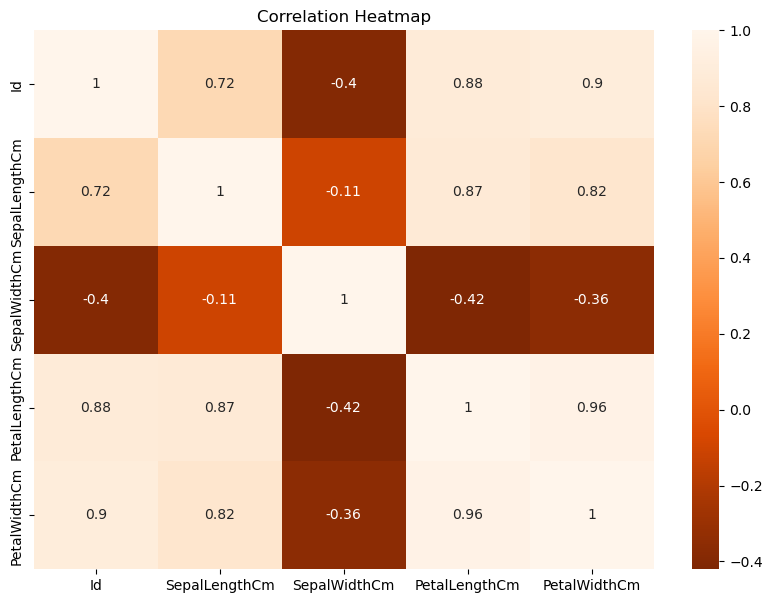

In [20]:
numeric_df = iris_df.select_dtypes(include=[float, int])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="Oranges_r")
plt.title('Correlation Heatmap')
plt.show()

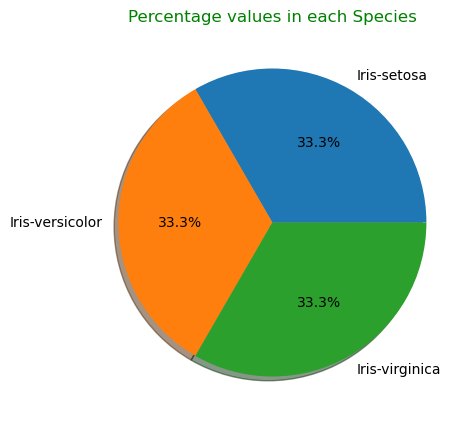

In [18]:
 # Check value counts
iris_df["Species"].value_counts().plot(kind="pie",autopct = "%1.1f%%",shadow=True, figsize=(5,5))
plt.title("Percentage values in each Species", fontsize = 12 , c = "g")
plt.ylabel("",fontsize=10,c="r")
plt.show()

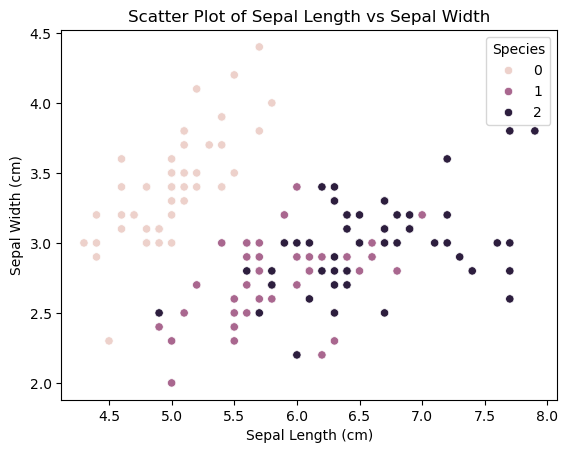

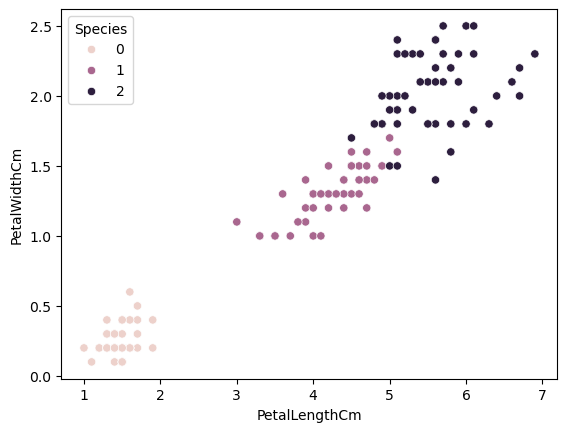

In [49]:
# Create a scatter plot
sns.scatterplot(x=iris_df["SepalLengthCm"], y=iris_df["SepalWidthCm"], hue=iris_df["Species"])

# Display the plot
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

sns.scatterplot(x = iris_df["PetalLengthCm"], y = iris_df["PetalWidthCm"], hue = iris_df["Species"])
plt.show()

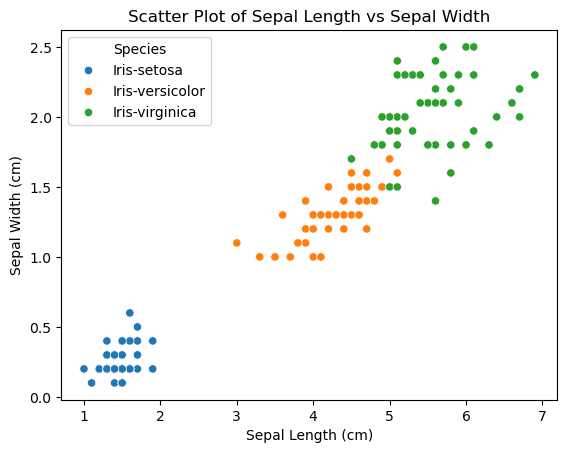

In [26]:
sns.scatterplot(x = iris_df["PetalLengthCm"], y = iris_df["PetalWidthCm"], hue = iris_df["Species"])

# Display the plot
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()



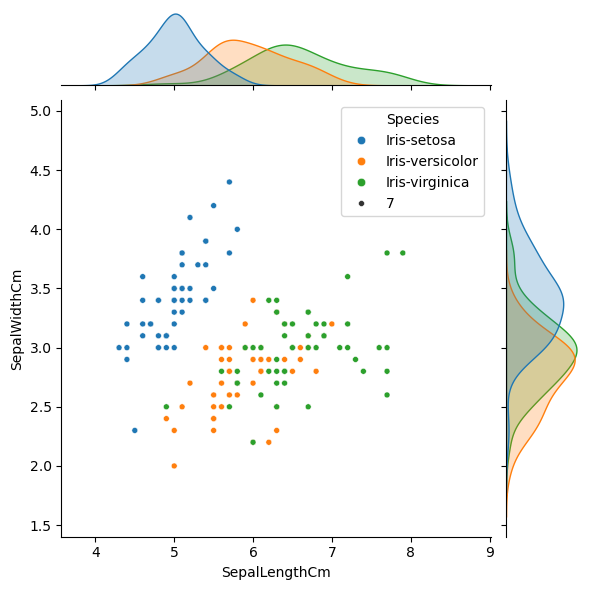

In [27]:
sns.jointplot(data = iris_df , x = "SepalLengthCm", y = "SepalWidthCm" , size = 7 , hue = "Species")
plt.show()

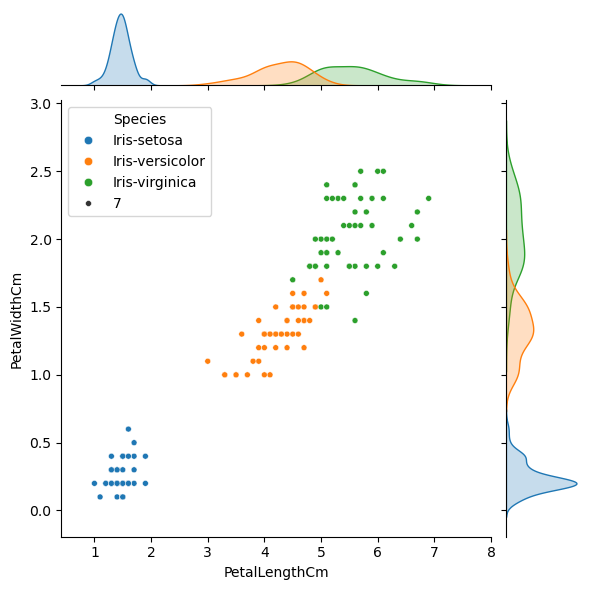

In [28]:
sns.jointplot(data = iris_df , x = "PetalLengthCm", y = "PetalWidthCm" , size = 7 , hue = "Species")
plt.show()

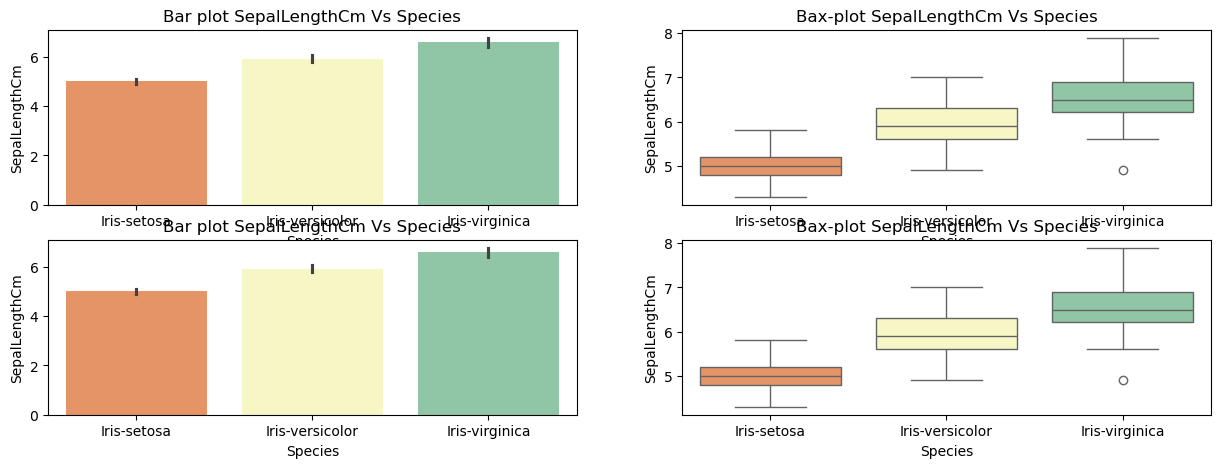

In [29]:
plt.figure(figsize = (15,5))
plt.subplot(2,2,1)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bar plot SepalLengthCm Vs Species")
plt.subplot(2,2,2)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bax-plot SepalLengthCm Vs Species")
plt.subplot(2,2,3)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bar plot SepalLengthCm Vs Species")
plt.subplot(2,2,4)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bax-plot SepalLengthCm Vs Species")
plt.show()

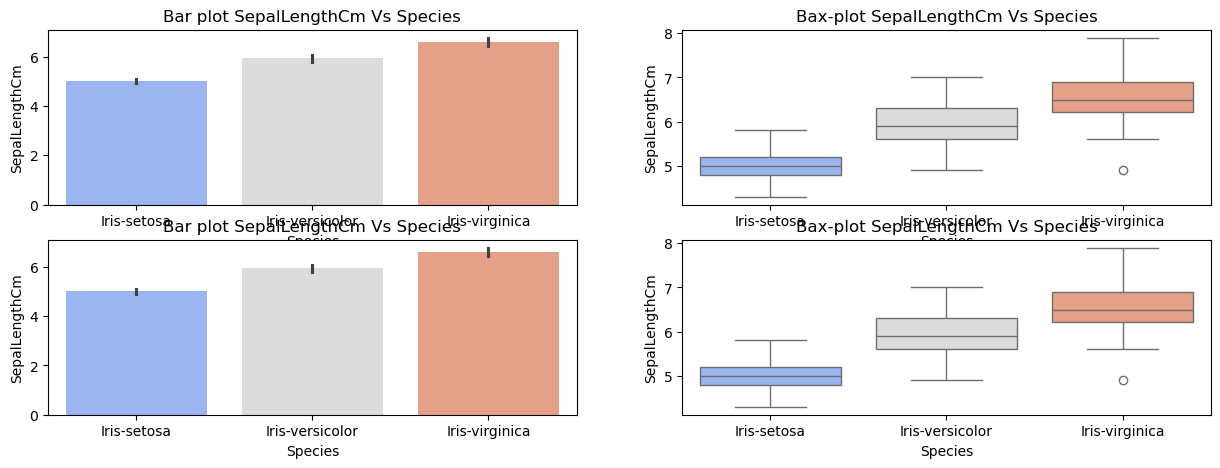

In [30]:
plt.figure(figsize = (15,5))
plt.subplot(2,2,1)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("coolwarm"))
plt.title("Bar plot SepalLengthCm Vs Species")
plt.subplot(2,2,2)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("coolwarm"))
plt.title("Bax-plot SepalLengthCm Vs Species")
plt.subplot(2,2,3)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("coolwarm"))
plt.title("Bar plot SepalLengthCm Vs Species")
plt.subplot(2,2,4)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("coolwarm"))
plt.title("Bax-plot SepalLengthCm Vs Species")
plt.show()

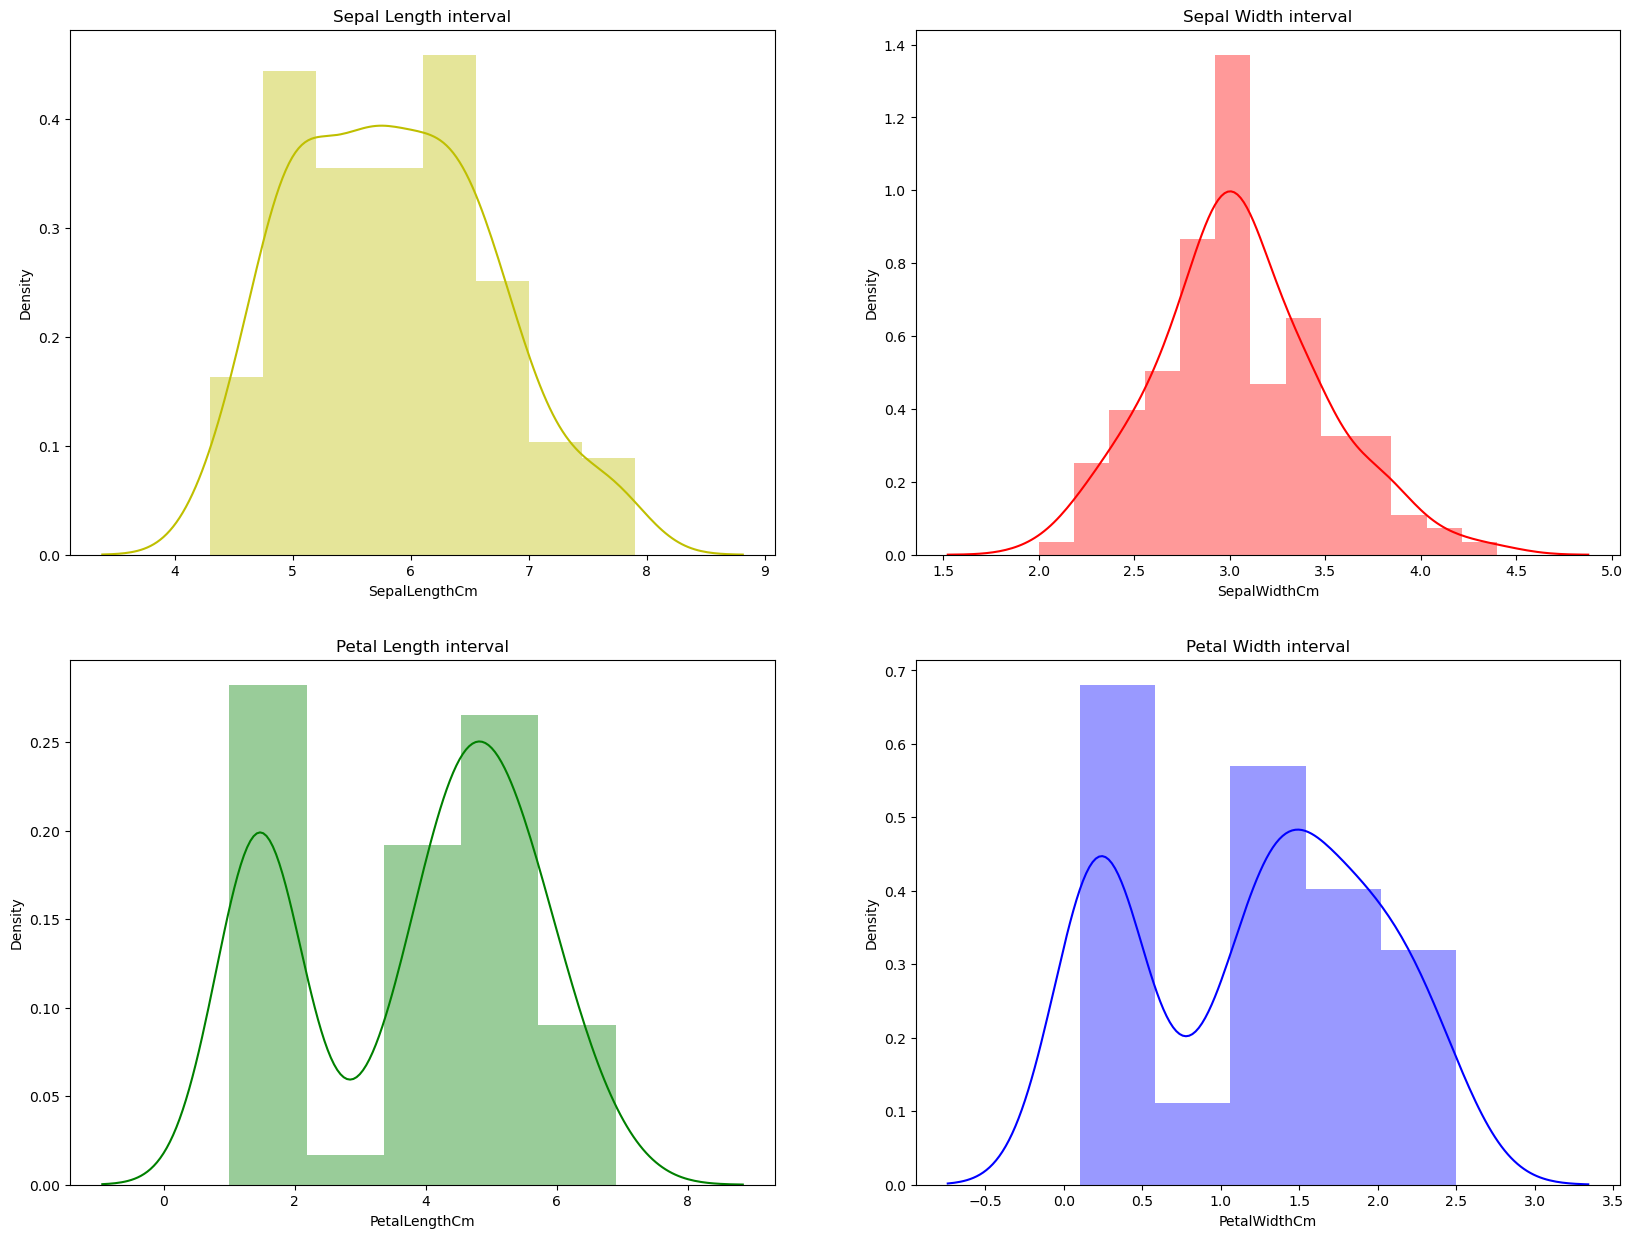

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(iris_df["SepalLengthCm"],color="y").set_title("Sepal Length interval")
plt.subplot(2,2,2)
sns.distplot(iris_df["SepalWidthCm"],color="r").set_title("Sepal Width interval")
plt.subplot(2,2,3)
sns.distplot(iris_df["PetalLengthCm"],color="g").set_title("Petal Length interval")
plt.subplot(2,2,4)
sns.distplot(iris_df["PetalWidthCm"],color="b").set_title("Petal Width interval")
plt.show()

In [32]:
 # Change Categorical Data into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df["Species"] = le.fit_transform(iris_df["Species"])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [33]:
X = iris_df.iloc[:,[0,1,2,3]]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [34]:
y = iris_df.iloc[:, - 1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

Model Building
Supervised Machine Learning
Split data into Training and Testing Set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")
y_pred = lr.predict(X_test)
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:-")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is:-",accuracy*100)
print("Classification Report:-")
print(classification_report(y_test,y_pred))

Logistic regression successfully implemented
Confusion Matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")
y_pred = rfc.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



DecisionTree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")
y_pred = dtree.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy:-  96.66666666666667
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [42]:
from sklearn.tree import plot_tree

feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica']

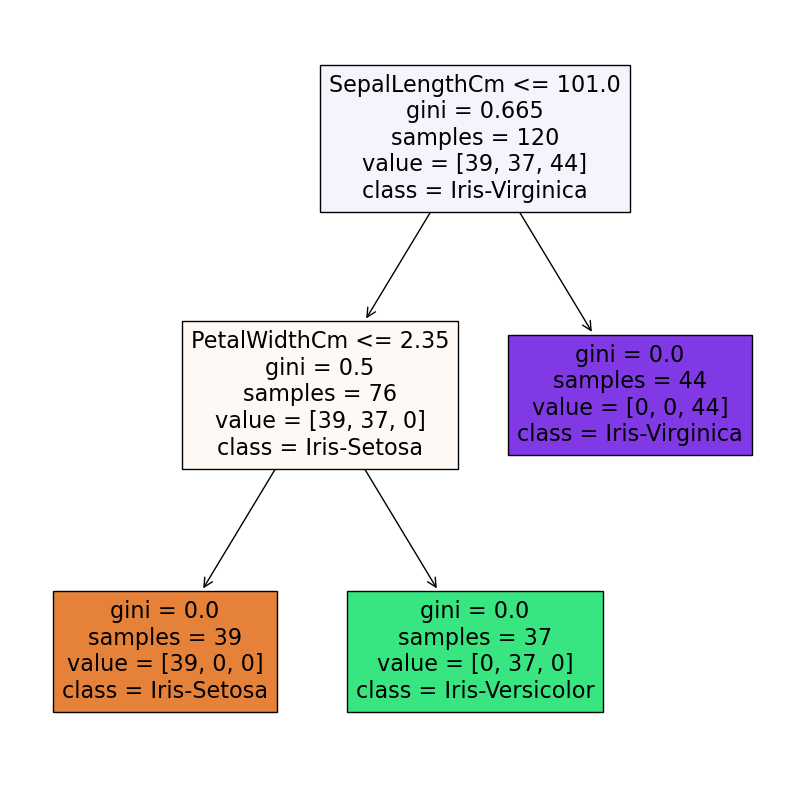

In [43]:
plt.figure(figsize=(10,10))
plot_tree(dtree, feature_names = feature, class_names = classes, filled = True);

Super Vector Machine

In [44]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)
print("Support vactor classifier is successfully implemented")
y_pred = svc.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Support vactor classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



KN Classifiers

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)
print("K-Nearest Neighbors classifier is successfully implemented")
y_pred = knn.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



naive_bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)
# Accuracy test
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Naive Bayes is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Testing Model

In [48]:
input_data=(4.9,3.0,1.4,0.2)
#changing the input data to a numpy array
input_data_as_nparray = np.asarray(input_data)
#reshape the data as we are predicting the label for only the instance
input_data_reshaped = input_data_as_nparray.reshape(1,-1)
prediction = dtree.predict(input_data_reshaped)
print("The category is",prediction)

The category is [0]


THANK YOU 
              --GURUPRASAD